# Tarea 1

Matías Deneken


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel("bbdd/MigrantesChile (2005-2016).xlsx")

def glimpse(df):
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
    print(df.dtypes)
    print("\nPrimeras 5 filas:")
    print(df.head())

# Usar la función con tu DataFrame
glimpse(df)


Filas: 177, Columnas: 16

ID Continent     int64
Continent       object
ID Country       int64
Country         object
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
2016             int64
dtype: object

Primeras 5 filas:
   ID Continent Continent  ID Country      Country  2005  2006  2007  2008  \
0           142      Asia         308  Afghanistan     8     4     5     1   
1           150    Europe         518      Albania     2     1     1     2   
2           150    Europe         563      Germany   495   481   562   614   
3           150    Europe         525      Andorra     2     1     1     1   
4             2    Africa         140       Angola     1     2     4     3   

   2009  2010  2011  2012  2013  2014  2015  2016  
0     2     1     3     6    15     4    12    15  


# 1



In [19]:


# Transformar la base de datos a formato largo
df_long = df.melt(id_vars=["ID Continent", "Continent", "ID Country", "Country"], var_name="Year", value_name="Migrants")
df_long = df_long[df_long["Year"].str.isnumeric()]
df_long["Year"] = df_long["Year"].astype(int)

# 1. Top 5 países europeos con más migrantes totales
df_europe = df[df["Continent"] == "Europe"]
df_europe["Total"] = df_europe.iloc[:, 4:].sum(axis=1)
top5_europe = df_europe.nlargest(5, "Total")

df_top5_long = df_long[df_long["Country"].isin(top5_europe["Country"])]
plt.figure(figsize=(10,6))
sns.lineplot(data=df_top5_long, x="Year", y="Migrants", hue="Country", marker="o")
plt.title("Evolución de Migrantes en los 5 países europeos con más migrantes")
plt.xlabel("Año")
plt.ylabel("Número de Migrantes")
plt.legend(title="País")
plt.show()


AttributeError: Can only use .str accessor with string values!

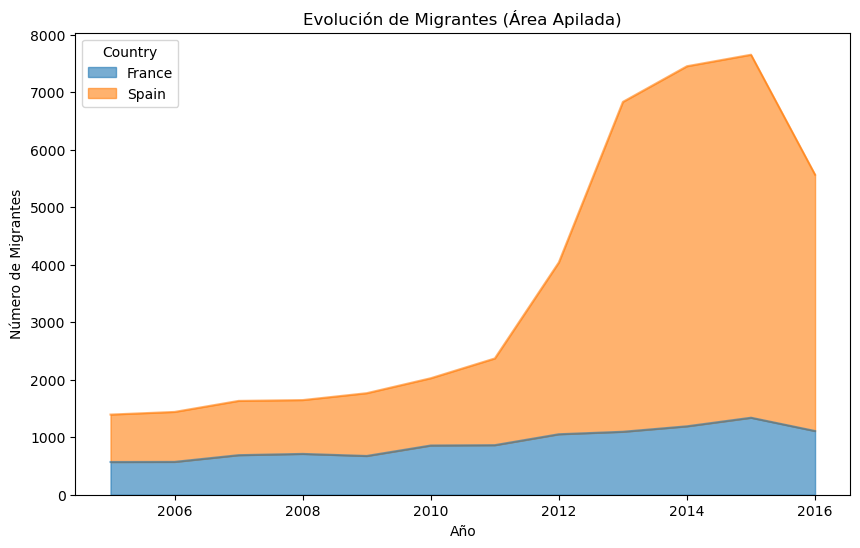

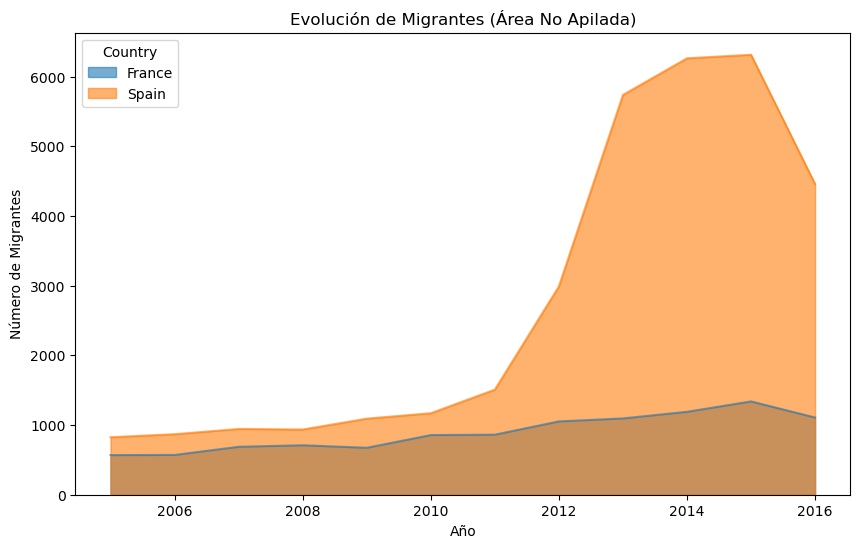

In [12]:
# 2. Área plot apilado y no apilado

# Seleccionar los dos países con más migrantes
top2 = top5_europe.nlargest(2, "Total")["Country"]
df_top2_long = df_long[df_long["Country"].isin(top2)]

df_pivot = df_top2_long.pivot(index="Year", columns="Country", values="Migrants")
df_pivot.plot(kind="area", stacked=True, figsize=(10,6), alpha=0.6)
plt.title("Evolución de Migrantes (Área Apilada)")
plt.xlabel("Año")
plt.ylabel("Número de Migrantes")
plt.show()

df_pivot.plot(kind="area", stacked=False, figsize=(10,6), alpha=0.6)
plt.title("Evolución de Migrantes (Área No Apilada)")
plt.xlabel("Año")
plt.ylabel("Número de Migrantes")
plt.show()

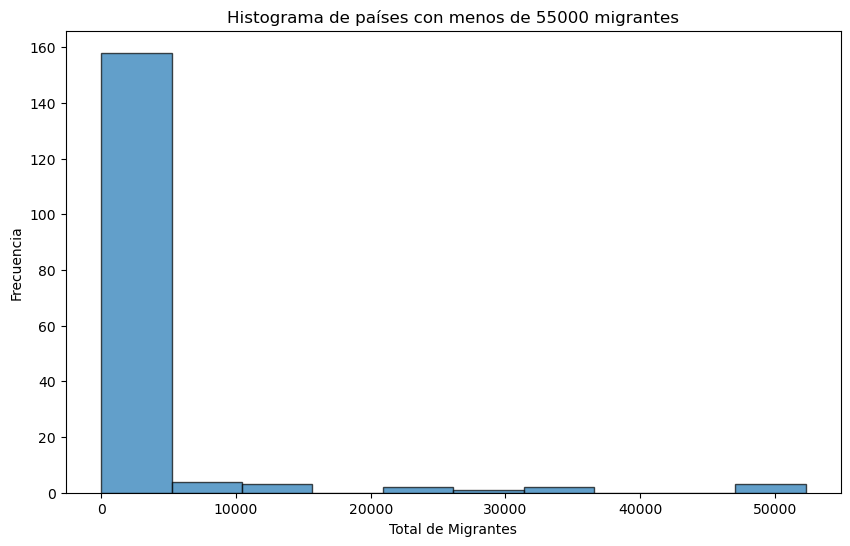

In [13]:
# 3. Histograma con bins ajustados
total_migrants = df.set_index("Country").iloc[:, 4:].sum(axis=1)
df_filtered = total_migrants[total_migrants <= 55000]
plt.figure(figsize=(10,6))
plt.hist(df_filtered, bins=10, alpha=0.7, edgecolor='black')
plt.title("Histograma de países con menos de 55000 migrantes")
plt.xlabel("Total de Migrantes")
plt.ylabel("Frecuencia")
plt.show()

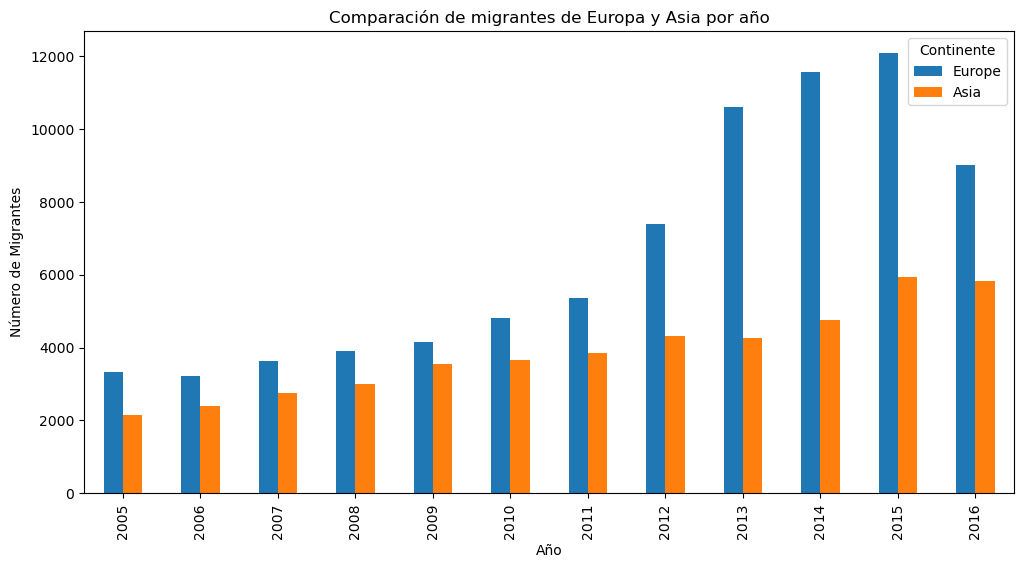

In [14]:
# 4. Bar chart comparando Europa y Asia
df_continent = df_long.groupby(["Year", "Continent"])["Migrants"].sum().unstack()
df_continent[["Europe", "Asia"]].plot(kind="bar", figsize=(12,6))
plt.title("Comparación de migrantes de Europa y Asia por año")
plt.xlabel("Año")
plt.ylabel("Número de Migrantes")
plt.legend(title="Continente")
plt.show()

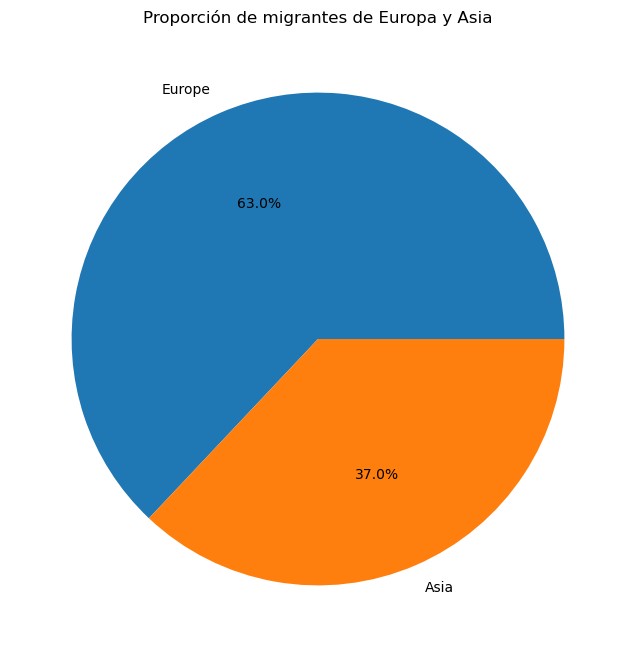

In [15]:
# 5. Pie chart comparando migrantes totales de Europa y Asia
total_migrants_continent = df_long.groupby("Continent")["Migrants"].sum()
total_migrants_continent = total_migrants_continent.loc[["Europe", "Asia"]]
total_migrants_continent.plot(kind="pie", autopct="%.1f%%", figsize=(8,8))
plt.title("Proporción de migrantes de Europa y Asia")
plt.ylabel("")
plt.show()


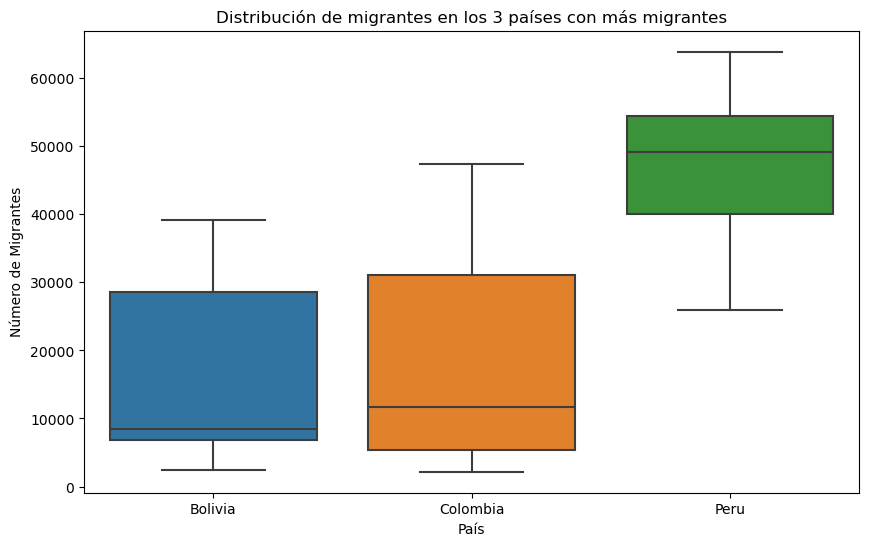

In [16]:
# 6. Box-and-whisker chart con los 3 países que más migrantes aportan
top3_countries = df.set_index("Country").iloc[:, 4:].sum(axis=1).nlargest(3).index
df_top3_long = df_long[df_long["Country"].isin(top3_countries)]
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top3_long, x="Country", y="Migrants")
plt.title("Distribución de migrantes en los 3 países con más migrantes")
plt.xlabel("País")
plt.ylabel("Número de Migrantes")
plt.show()
